# 1. Введение

→ В этом модуле мы поговорим об ещё одном направлении разведывательного анализа данных — проектировании признаков (Feature Engineering). Этот процесс также называют конструированием признаков или разработкой признаков. Все эти термины описывают процесс создания признаков, которые нужны для обучения модели.

Но мы же уже собрали данные на этапе сбора данных и подготовили данные на этапе очистки… Для чего повторно создавать части в EDA?

Как мы выяснили в предыдущих модулях, бывает недостаточно данных, собранных после этапа формирования проблемы. Данные могут быть представлены в «неподобающем» для обучения виде, например в формате даты или времени, большого текста. 

Пример

При прогнозировании дефолта клиента банка для создания прогнозной модели очень важно иметь информацию о дате выдачи кредита, плановой и действительной датах погашения. Эти даты дают нам представление о характере погашения кредита: был он выплачен вовремя или раньше срока, с просрочкой. 

В отличие от человека, модель машинного обучения не может проанализировать эти даты. А вот информация о просрочке (разница между плановой и фактической датой погашения) представлена в числовом формате и может сообщить некую информацию модели. Число, равное или меньше 0, говорит о клиенте как о благонадёжном заёмщике; число больше нуля характеризует заёмщика как должника. Такое конструирование признаков помогает дата-сайентисту не утратить часть данных, а также представить их в более «выгодном» свете.

В знакомой нам задаче винных обзоров информация о вкусовых качествах вина также может оказаться важной при его оценке, но не может быть передана в модель машинного обучения, так как этот признак — сплошной текст. Однако мы можем вычленить из текста информацию о положительной или отрицательной оценке вина, превратив её в признаки. Такой признак, скорее всего, оказался бы важным в определении качественных вин. Определить его значимость мы сможем только на этапе отбора признаков, который мы также будем изучать в модулях EDA.

Избавляться от перечисленных выше данных было бы неправильно, ведь мы можем лишиться части потенциально важной информации. Проектирование признаков как раз занимается преобразованием такой информации в признаки для будущей модели машинного обучения. 

На этапе проектирования признаков специалисты по данным преследуют такие же цели, как на этапе сбора данных — сконструировать как можно больше признаков, чтобы далее отобрать из них лучшие.

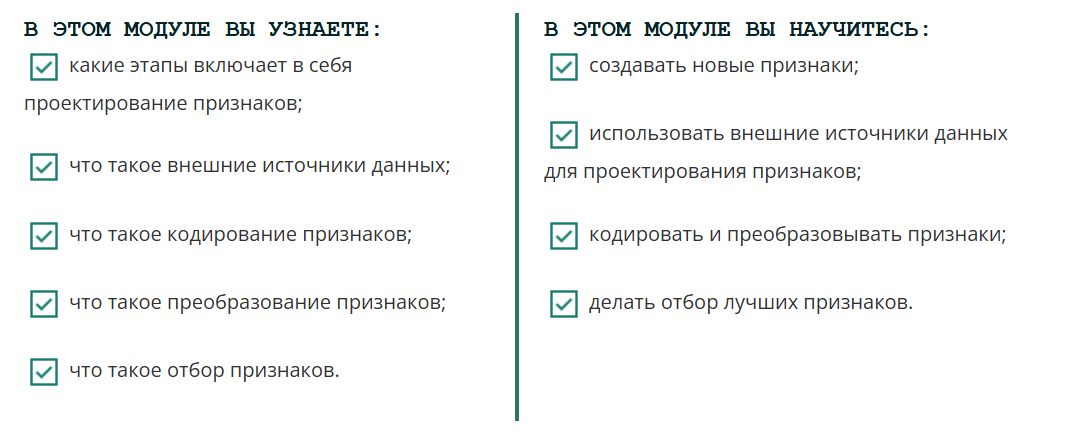

# 2. Создание признаков

→ Проектирование признаков — самый творческий процесс во всём цикле жизни создания модели машинного обучения. 

Он включает в себя несколько этапов: 

1. создание признаков;
2. преобразование признаков;
3. отбор признаков.

В данном модуле мы подробно познакомимся с каждым из этапов проектирования признаков. Этот юнит будет посвящён процессу создания признаков.

Вы уже знакомы с методами создания столбцов в pandas из модуля PYTHON-11. Базовые приемы работы с данными в Pandas. Юнит 2. Базовые операции со столбцами DataFrame. Советуем повторить этот материал.

Создание признаков, feature extraction, часто именуемое генерацией признаков, — творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации. 

Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные.

Новые признаки могут быть сконструированы двумя способами: 

1. с помощью внешних источников данных;
2. из существующего набора данных.

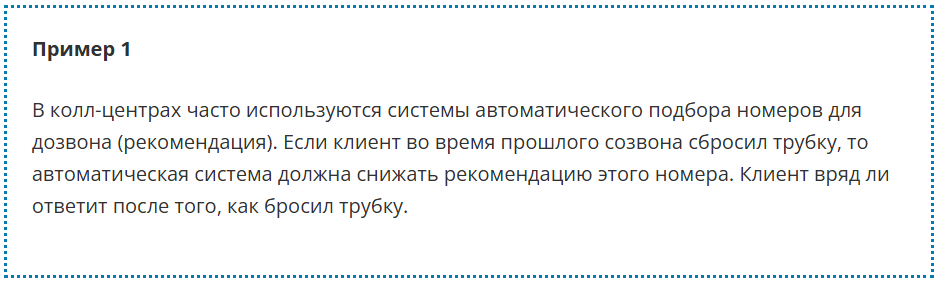

В выделении этого факта нам поможет создание нового признака «сброс трубки» из информации в существующем датасете. Эта информация может быть получена из уже существующих признаков, например если время звонка составило меньше 10 секунд.

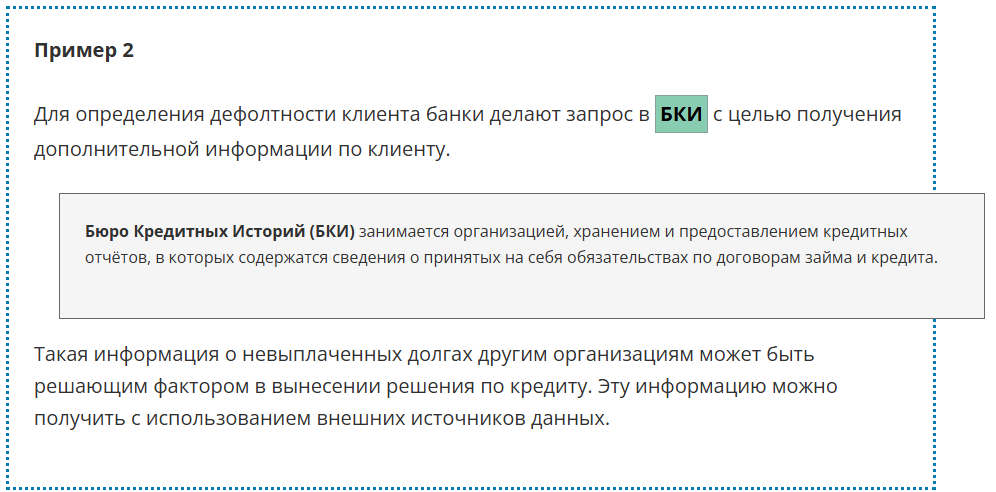

Работе с внешними источниками данных будет посвящен следующий юнит.

Новые признаки можно сконструировать из уже существующего набора данных несколькими способами: 

1. разбор категорий; 
2. разбор даты и времени;
3. разбор числовых признаков;
4. разбор текста.

Рассмотрим эти способы на примере задачи винных обзоров. Вспомним задачу винного сомелье — научиться определять рейтинг (качество) вина по его различным характеристикам. В этом модуле для практических заданий мы будем пользоваться подготовленным и очищенным датасетом.

### Разбор даты и времени

Признаки, обозначающие дату и время, могут содержать много полезной информации. 

Например, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

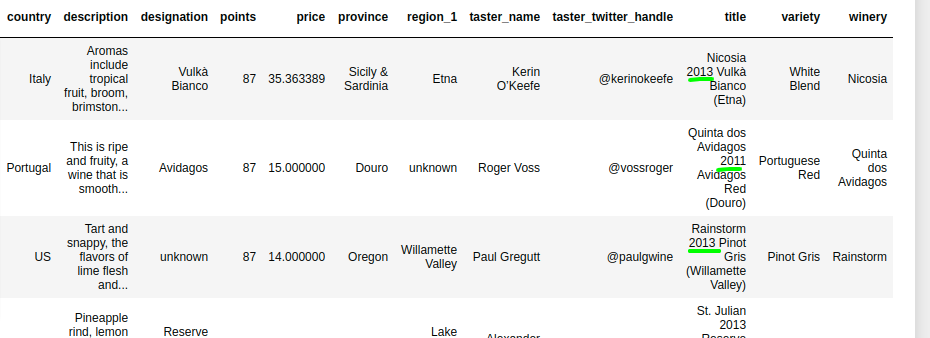

Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

Подробнее про создание признаков из даты и времени вы узнаете в одном из следующих юнитов.

### Разбор числовых величин

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену 35.363389$ в 35$, избавив данные от лишней информации.

In [175]:
import pandas as pd
import seaborn as sns

In [176]:
data = pd.read_csv('data/wine_cleared.csv') # чтение данных
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


✍️ Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [177]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14


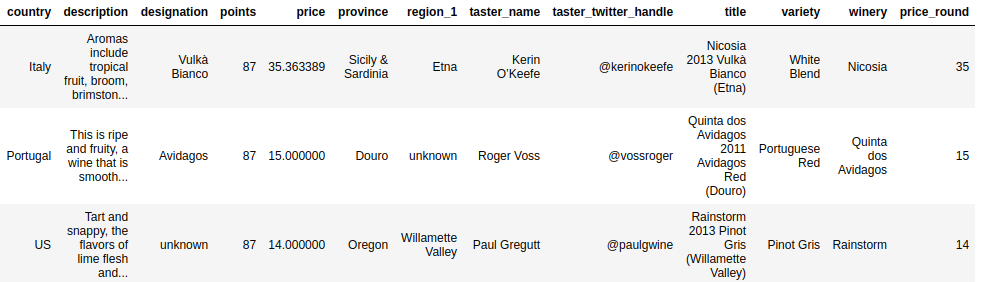

Для таких преобразований важен контекст. В контексте вина для сомелье цена в 35$ и 35.363389$ одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.

Однако такое преобразование неуместно в ситуациях, когда сотые важны. Например, при предсказании курса лиры стоимость валюты в 6.12 руб. и в 6.84 руб. — абсолютно разные ситуации. 

Помимо округления для создания новых признаков могут применяться такие популярные операции, как логарифмирование числового признака или извлечение его корня. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований вы узнаете далее в юните преобразования данных.

### Разбор текста

Текстовые признаки могут содержать в себе большое количество информации. Например, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться **регулярными выражениями**.

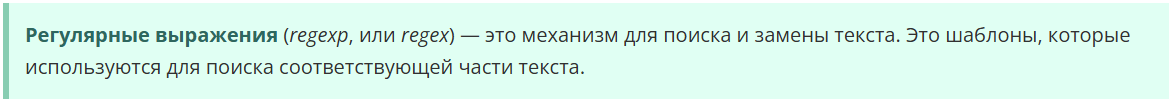

Например, с помощью такого регулярного выражения **[^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+** можно найти любой email в тексте.

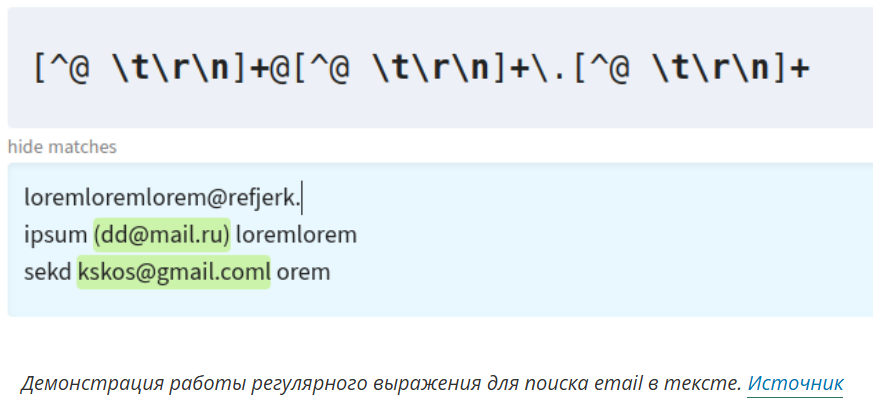

https://ihateregex.io/playground/

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее. Подробнее ознакомиться с синтаксисом регулярных выражений поможет статья Python RegEx: практическое применение регулярок.

https://tproger.ru/translations/regular-expression-python

Реализация такого механизма существует в pandas в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом str.findall(). Метод возвращает все совпадения с заданным шаблоном в серии pandas. 

✍️ Выполните код для нахождения года вина при помощи регулярного выражения:

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html

In [178]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013


Разберём регулярное выражение \d{4}:

- \d — класс символов, обозначает соответствие цифрам в диапазоне цифр [0-9];
- {4} в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, \d{4} означает поиск четырехзначных чисел в заданной строке.

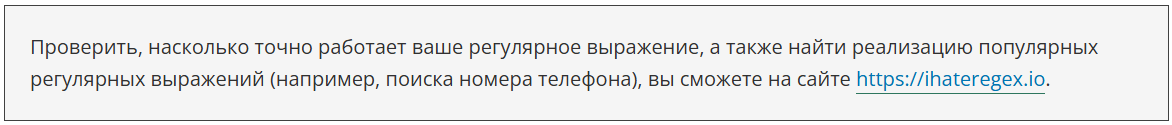

https://ihateregex.io/

Однако при поиске числа методом **data['title'].str.findall(regex)** результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом str.get(0), где 0 — первый элемент в списке найденных чисел.

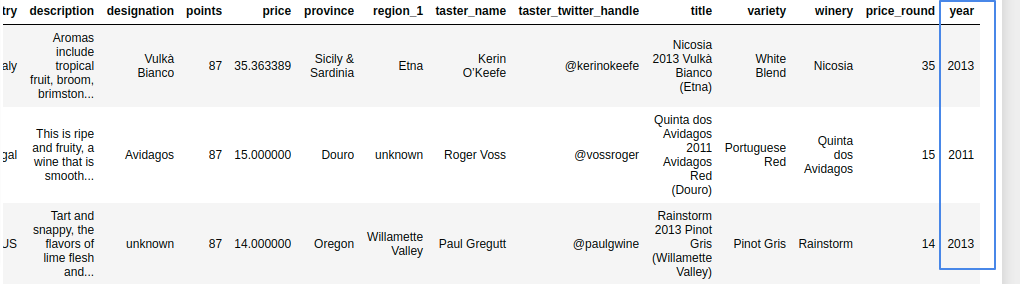

Используя методы работы со строками pandas и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

### Разбор категорий

В наборе данных винных обзоров самая популярная страна-производитель вина — США. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [179]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.

In [180]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [181]:
data['is_france'].sum()

22093

In [182]:
data['is_italy'].sum()

19540

Вы можете углубиться в разбор категориальных признаков — создать бинарный признак для каждого значения страны. Можно не делать это вручную: существуют специальные способы кодирования. Об особенностях этого подхода мы поговорим в юните Кодирование данных.

Также вы можете создавать некие бизнес-правила, гипотезы. О правилах их построения вы узнаете далее в материалах, посвящённых статистическим гипотезам. 

Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете 40 % вин старше 2010 года. 

Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

В ответ впишите результат выполнения кода data['old_wine'].sum():

In [183]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39765

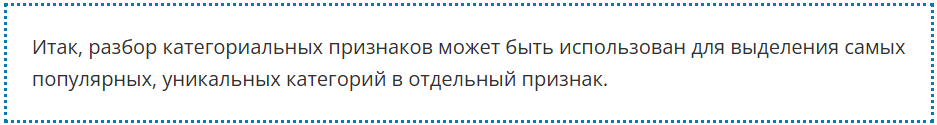

Таким образом, разбор категорий, даты и времени, числовых признаков, текста применяются для создания новых, более сильных признаков для обучения.



In [184]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley


→ В этом юните мы рассмотрели основные подходы к созданию признаков из существующего набора данных. Далее мы узнаем, как создавать новые признаки из внешних источников данных. 

# 3. Создание признаков. Внешние источники данных

→ В машинном обучении часто используют внешние источники данных для создания признаков. Это может быть необходимо для получения совершенно новой информации, которая может быть важнее исходных признаков.

**Внешние источники данных** — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.

Открытые источники доступны всем пользователям интернета. Их предоставляют такие источники, как Федеральная служба государственной статистики, Федеральная налоговая служба, Центральный банк, Википедия и так далее.

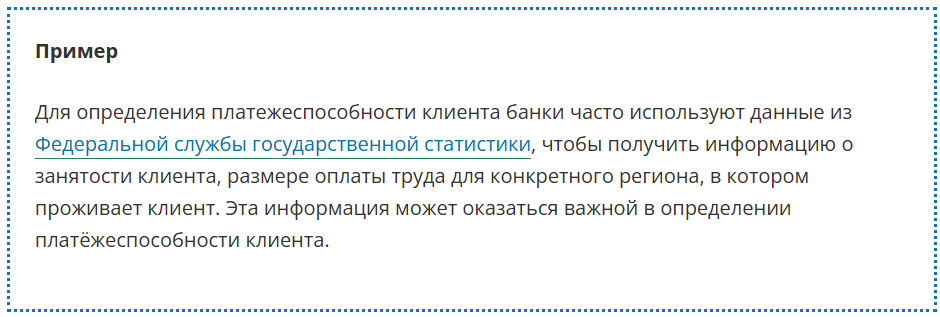

https://rosstat.gov.ru/labor_market_employment_salaries

Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги (data as a service) у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.

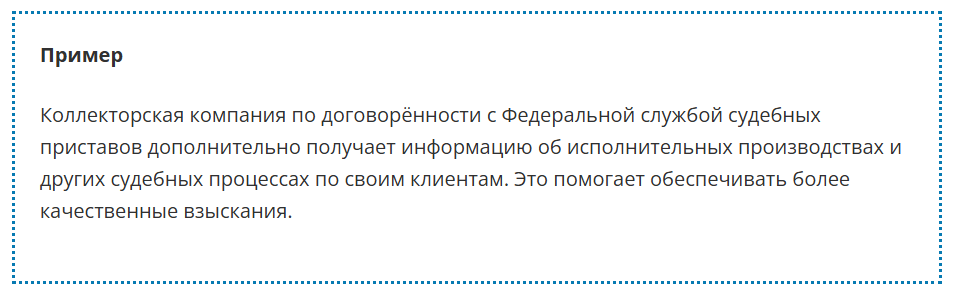

Для получения информации из внешних источников данных специалисты по данным могут скачивать информацию с сайтов, парсить их и взаимодействовать с внешними сервисами по API.

https://rosstat.gov.ru/

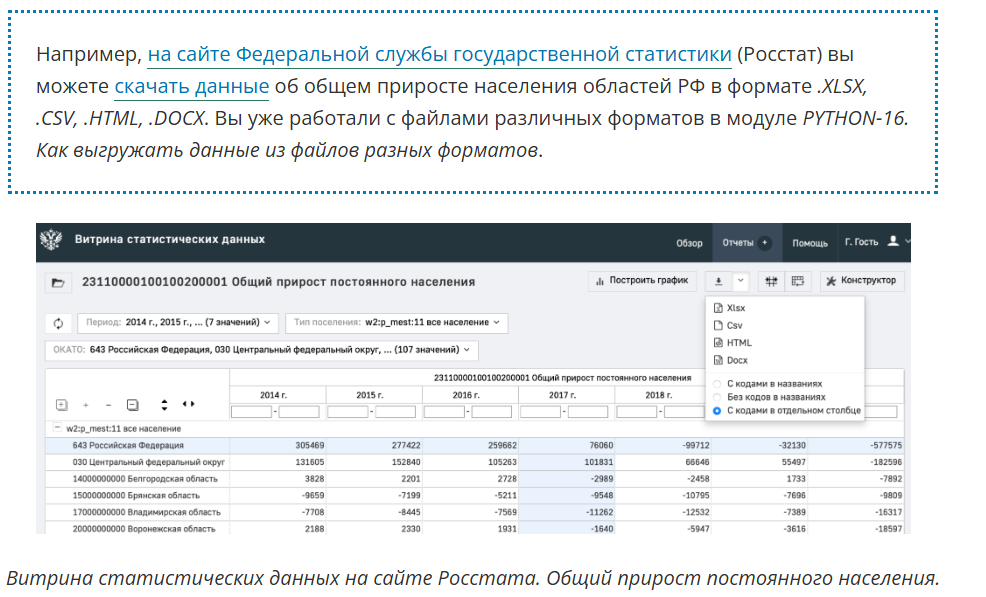

Также специалисты по данным используют API или парсинг для получения дополнительной информации. Вы уже научились парсингу сайтов и работе с API в модуле PYTHON-17. Как получать данные из веб-источников и API.

Дата-инженеры могут запрашивать у сотового оператора по API информацию о принадлежности номера телефона определённому клиенту. Такую информация можно использовать, чтобы выяснить, скрывает ли человек своё настоящее имя.

Когда данные получить необходимо, а API у источника данных нет, дата-инженеры прибегают к парсингу. 

Например, вы хотите в целях обучения создать модель, которая бы предсказывала стоимость автомобиля по заданным характеристикам. Из данных у вас есть только марка автомобиля и его стоимость. Произведя парсинг сайта auto.ru, вы сможете получить дополнительную информацию о марках автомобиля: тип кузова, габариты, расход топлива, — и понять, из каких параметров складывается цена на автомобиль.

**Внешняя информация** бывает общая и профильная.

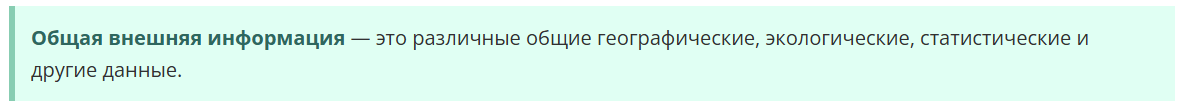

- географические: население страны, площадь страны, столица страны и так далее.
- экологические: среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.
- статистические: доходы населения, половозрастной состав, уровень безработицы и так далее.

Они находятся в открытых источниках: Росстат, Википедия и так далее.

Для доступа к ним применяется парсинг, скачивание и работа с файлами файлов, реже — работа по API.

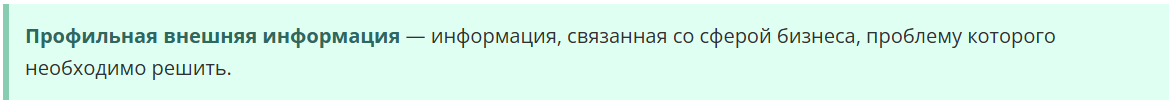

Например, при прогнозировании рейтинга ресторана мы можем использовать ссылки на сайт TripAdvisor для парсинга и получения информации о ресторанах. При рекомендации фильмов в приложении мы можем пользоваться информацией с «Кинопоиска» о фильмах. Также это могут быть запросы в сервисы — запрос в Dadata.ru для проверки действительности адреса. 

Для доступа к такой информации часто применяются запросы по API, парсинг, работа с файлами.

https://dadata.ru/

Давайте попробуем использовать внешние источники данных для получения информации к нашему набору данных. 

### Работа с файлами

Часто маленькие страны с небольшим количеством населения имеют узкую специализацию. Например, в производстве вина особенно успешны Франция, Италия, Испания, Новая Зеландия. Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

⬇️ Дата-инженеры предоставили нам файл country_population.zip (необходимо распаковать) с данными о населении по странам. 

In [185]:
country_population = pd.read_csv('data/country_population.csv', sep=';')
country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [186]:
country_population[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

In [187]:
data = data.join(country_population.set_index('country'), on='country')
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386"


В результате объединения получаем информацию о населении страны в каждой строке:

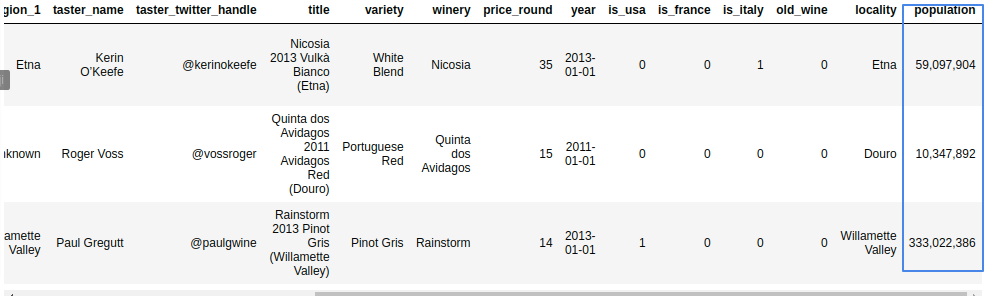

Итак, мы получили новый признак для нашего датасета — население страны.

⬇️ Теперь используем файл country_area.zip (необходимо распаковать) для информации о площади страны.

Прочитаем файл:

In [188]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


Прочитав файл, мы получили привычный нам датафрейм с полями country — название страны, area — площадь страны.

Создайте новый признак area_country — площадь страны, аналогичный признаку population.

Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [189]:
data = data.join(country_area.set_index('country'), on='country')
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0


In [190]:
area = data.loc[
    data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))',
    'area'
].iloc[0]
print(round(area))

9372610


Итак, мы получили два новых признака, используя общую внешнюю информацию и навыки выгрузки данных и файлов различных форматов. Более профессиональные методы, например парсинг, вы будете использовать в практических проектах, чтобы получить профильную внешнюю информацию.

Внешней информации можно получить очень много. Руководствуйтесь следующими **правилами при работе с внешними источниками данных:**

1. Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая температура страны, в которой снят фильм.

2. Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.

3. Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.

4. Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн — это также требует времени. 

5. Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.

→ В этом юните мы ознакомились с основами создания признаков, используя внешние источники данных. Предлагаем ответить на вопросы для закрепления материала!

# 4. Создание признаков. Работа с форматом «дата-время»

Очень часто при сборе данных для предсказательных моделей появляются признаки, выраженные датой и временем. С датой и временем вы работали в модуле PYTHON-11. Базовые приёмы работы с данными в Pandas Юнит 3. Работа с датами в DataFrame.

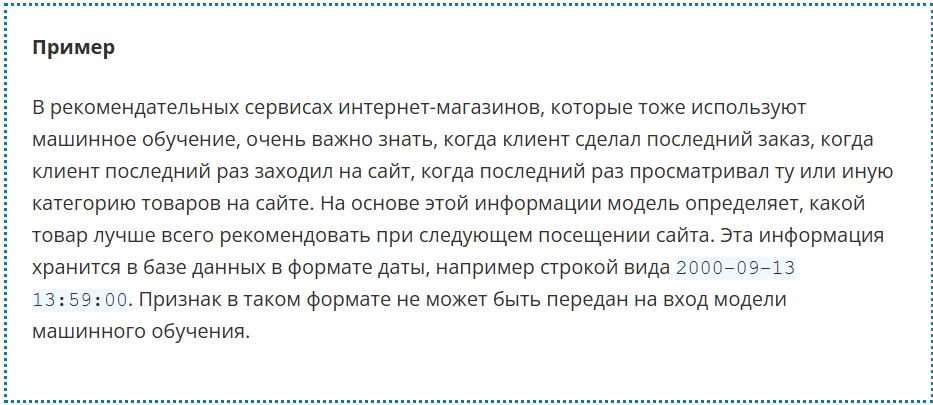

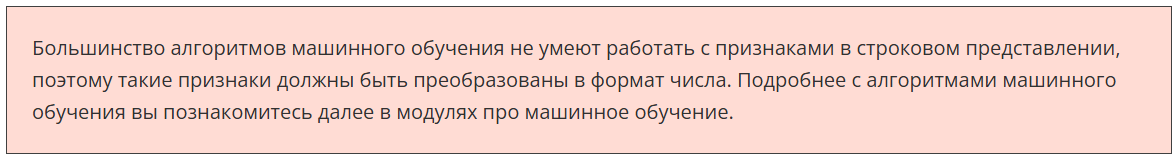

Чтобы не потерять важную информацию, заключённую в формате даты и времени, необходимо преобразовать эту информацию таким образом, чтобы признак был в формате числа, а не строки. 

Например, дата последнего захода на сайт может быть преобразована в количество дней с момента последнего входа на сайт, то есть результат разницы между текущей датой и датой последнего захода на сайт:

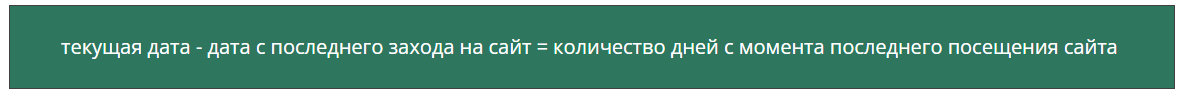

Также мы можем посчитать количество минут, секунд, месяцев, лет с момента какой-либо даты. Это зависит от контекста:

- минуты и секунды актуальны для событий, часто меняющихся во времени;
- месяцы и года — для событий, которые происходят реже. Например, вычисление возраста из даты (лет), подсчёт стажа на последнем месте работы (месяцев, лет).

Помимо разницы в датах вы можете подмечать, в какое время суток произошло некое событие: день, вечер, ночь. 

Также вы можете выделять из даты месяц или время года некоего события. Так вы сможете выяснить, например, влияет ли время года на покупку бытовой техники на сайте компании.

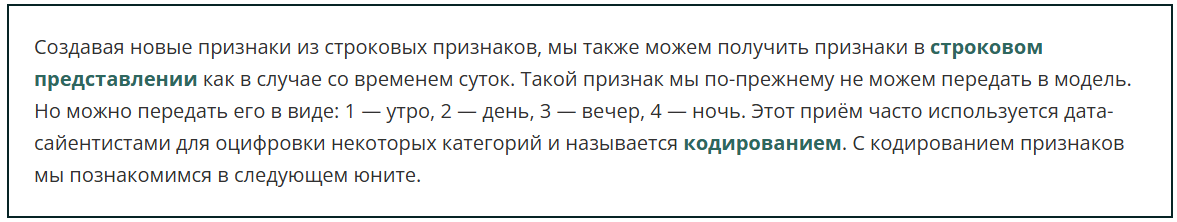

Мы рассмотрели самые популярные идеи для создания признаков из даты, но вы можете придумать гораздо больше вариантов, так как генерация признаков — это очень творческий процесс, ограниченный только фантазией и временем автора.

✍️ Давайте теперь приступим к практическим заданиям. В следующих заданиях мы будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому — нет.

Давайте рассмотрим, из каких признаков состоит срез данных:

- client_id — идентификатор клиента в базе;
- agent_date — время соединения с агентом;
- created_at — время соединения с клиентом (начало разговора);
- end_date — время окончания соединения с клиентом (конец разговора).

Прочитаем данные:

In [191]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Все признаки в наборе данных, за исключением номера клиента, представляют собой дату и время. Давайте создадим несколько признаков из этих данных.

Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании — длительность разговора. 

Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

In [192]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Таким образом мы получили новый признак duration — длительность разговора в секундах.

Давайте создадим ещё несколько признаков на основе существующих.

Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.

В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

In [193]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


In [194]:
calls['time_connection'].sum()

89

Факт дозвона очень важен для компании, ведь если до клиента не удалось дозвониться, необходимо звонить ещё. 

Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.

В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [195]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.

В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [196]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [197]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

Итоговый набор данных включает в себя колонки client_id, duration, time_connection, is_connection, time_diff. После генерации признаков специалисты по машинному обучению проводят отбор признаков. Этому вы научитесь далее в юните про отбор признаков.

Таким образом, мы получили набор данных с признаками, которые можно подать на вход модели, и не потеряли важную информацию о событиях, произошедших в даты набора данных. 

В следующем юните вы познакомитесь с кодированием признаков. А сейчас предлагаем вам ответить на несколько вопросов для закрепления материала. ⬇️

Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. Параметр нужно установить в значение coerce:

In [198]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')

Подробнее о назначении этого параметра вы можете прочесть в документации.

In [199]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
data['years_diff'] = (pd.to_datetime("2022-01-12") - data['year']).dt.days
data['years_diff'].max()

98627.0

# 5. Кодирование признаков. Методы

Ещё одним важным этапом проектирования признаков является обработка нечисловых (категориальных) признаков. Многие модели машинного обучения не умеют работать с категориальными данными. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 

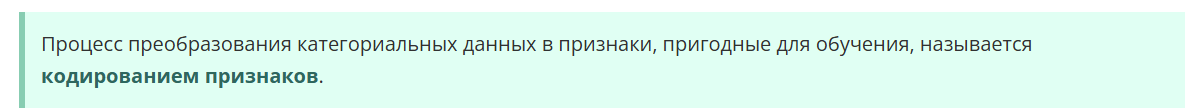

Для лучшего усвоения материала предлагаем вам повторить типы категориальных признаков в ранее пройденном модуле PYTHON-11. Базовые приемы работы с данными в Pandas Юнит 5. Тип данных Category.

Существует множество методов кодирования. Выбор подходящего метода часто превращается в сложную задачу. Для упрощения этой задачи мы будем использовать схему выбора метода кодирования, изображённую на рисунке ниже.

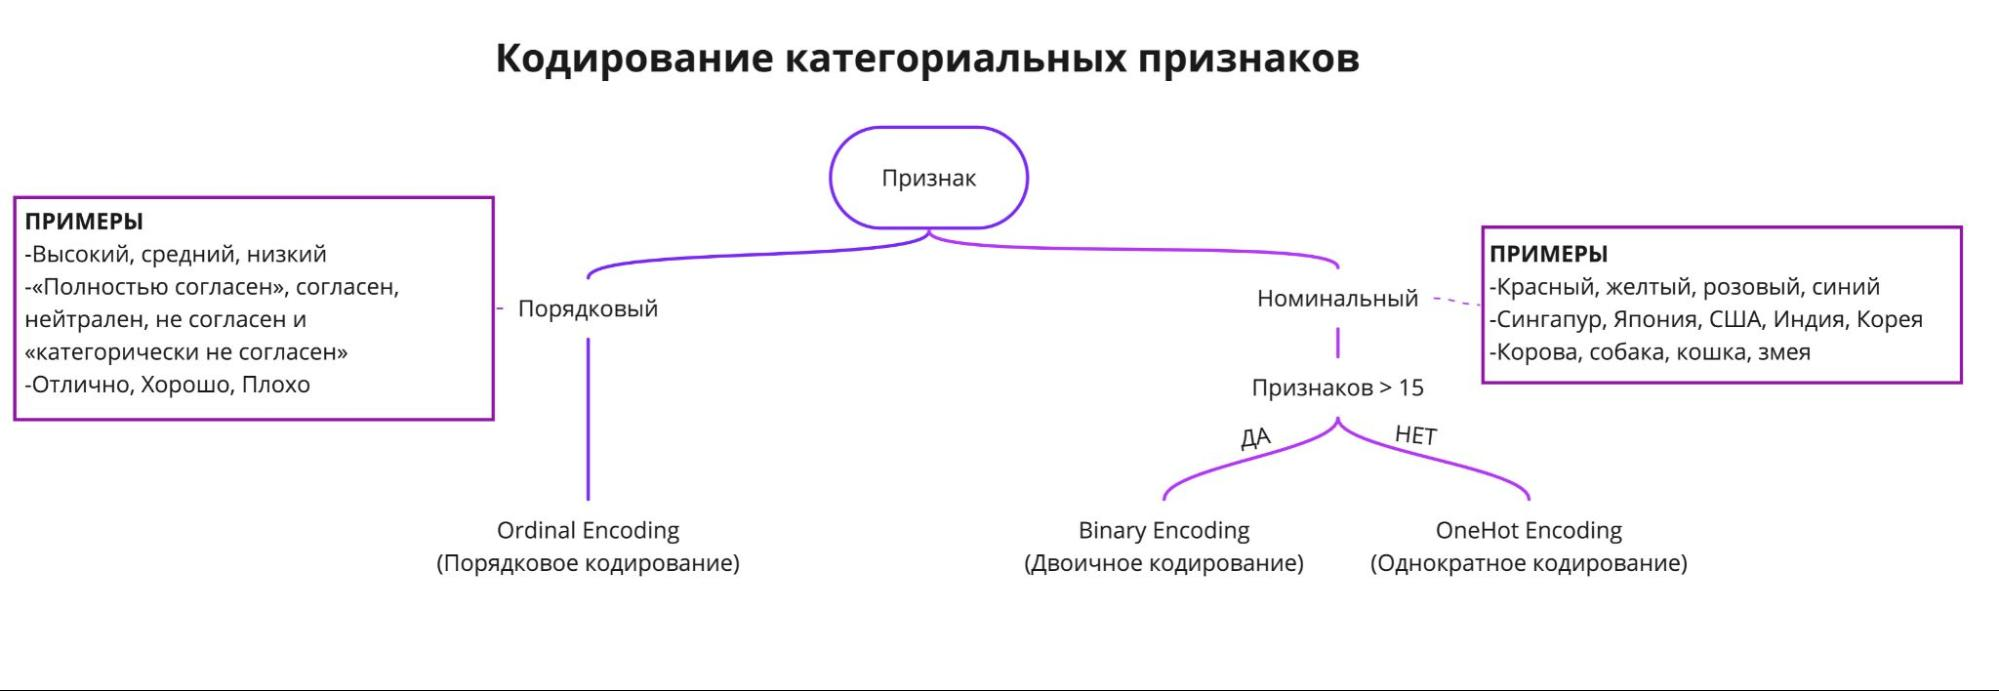

Эта схема предназначена только для категориальных признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте **порядковое кодирование** (Ordinal Encoding). 

Для **номинальных признаков** важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных **однократное кодирование** (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например **бинарный** (Binary Encoding).

Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку category_encoders. Это удобная библиотека для кодирования категориальных переменных различными методами.

https://contrib.scikit-learn.org/category_encoders/

Установим библиотеку:

In [200]:
#pip install category_encoders

Импортируем библиотеку category-encoders для дальнейшего использования. 

In [201]:
import category_encoders as ce

Рассмотрим следующие популярные способы кодирования: 

- порядковое кодирование (Ordinal Encoding); 
- однократное кодирование (OneHot Encoding); 
- бинарное кодирование (Binary Encoding).

Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [202]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


Вспомним о типах категориальных признаков в задании ниже. ⬇️

### Порядковое кодирование. Ordinal Encoding

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Результат кодирования порядкового признака size будет выглядеть так: каждому строковому значению присваивается значение в виде целого числа.

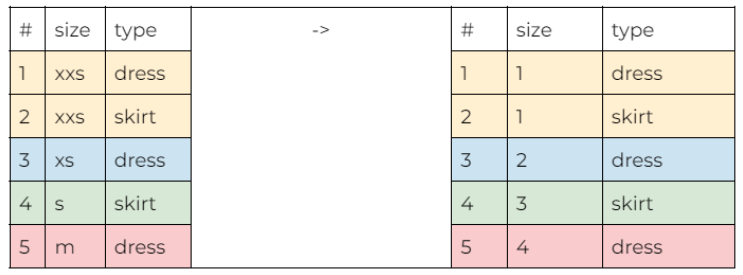

Выполним теперь кодирование порядкового признака size в Python. Порядковое кодирование в библиотеке реализовано в классе OrdinalEncoder. По умолчанию все строковые столбцы будут закодированы.

Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод concat() для добавления закодированного признака в датафрейм data.

https://contrib.scikit-learn.org/category_encoders/ordinal.html

In [203]:
# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. Мы можем закодировать признак size — размер одежды со значениями xxs, xs, s соответственно в значения 1, 2, 3. Это будет логично, и моделью не будут сделаны выводы о неправильном порядке. Увеличение размера будет соответствовать логическому увеличению кода этого значения: xxs меньше xs, и числовой код 1 (xxs) меньше, чем числовой код 2 (xs).

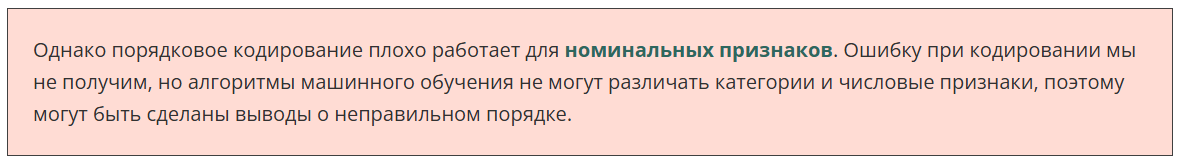

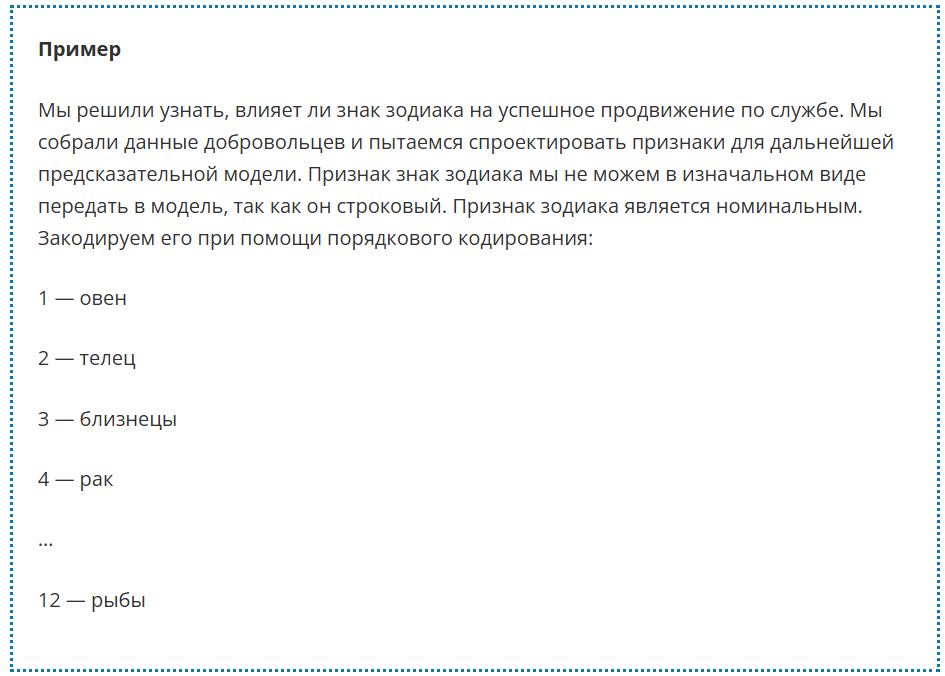

Мы получим признак в числовом представлении, и модель машинного обучения будет воспринимать знак зодиака как числовой признак. Ошибочен ли вывод, что чем больше числовой код знака зодиака, тем лучше (или наоборот хуже), как это было бы в порядковом признаке? Да, так как эти категории независимы. Ошибки мы не получим, однако для номинальных признаков существует более эффективные типы кодирования, которые мы рассмотрим позже.

В случае с магазином одежды для размера одежды size уместно применить **порядковое кодирование**. Кодирование размера xxs, xs, s в 1, 2, 3 будет соответствовать логическому увеличению порядка.

А для номинального признака type необходимо подобрать другое кодирование. Мы сделаем это далее в юните при знакомстве с **OneHot-кодированием**.

Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

In [206]:
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder()
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)

In [207]:
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,2013-01-01
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2011-01-01
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0,2013-01-01


# Однократное кодирование. One-Hot Encoding

Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием, которое мы делали в юните Создание признаков. Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории. 

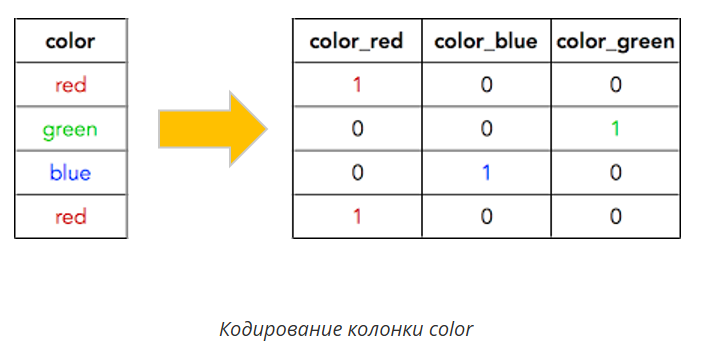

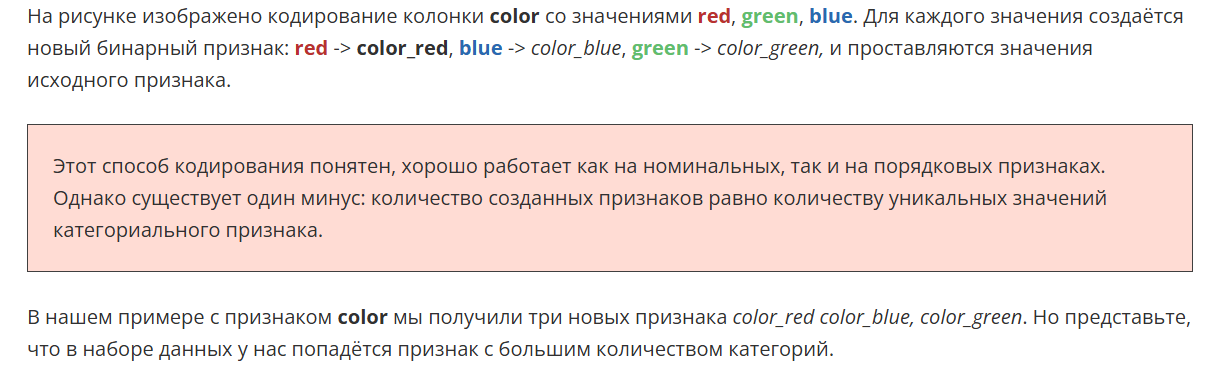

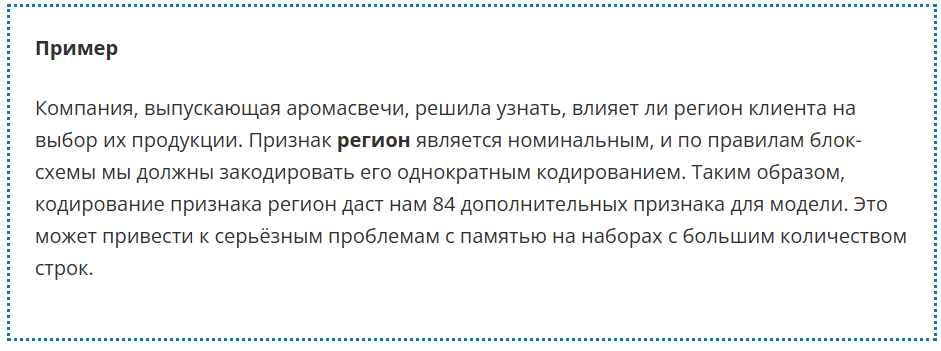

Вернёмся к датасету clothing. Закодируем признак type однократным кодированием. Результат кодирования будет выглядеть так: 

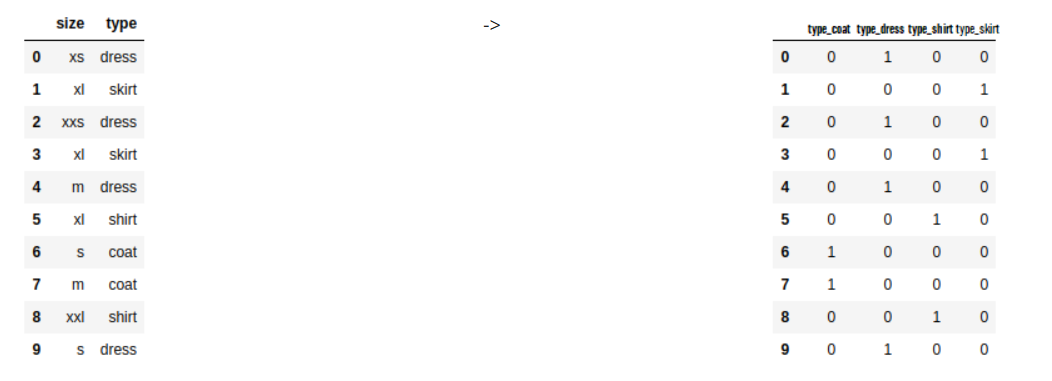

Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

https://contrib.scikit-learn.org/category_encoders/onehot.html

In [208]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


Таким образом, мы получили четыре новых признака для категорий coat, dress, shirt, skirt. В строке нужного типа исходного признака стоит значение 1, в остальных строках — 0. Эти признаки пригодны для обучения.

На самом деле метод однократного кодирования реализован в pandas в функции pd.get_dummies(). Для выполнения кодирования достаточно передать в функцию DataFrame и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа object:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [209]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])

Новые бинарные признаки также часто называются **dummy-признаками** или **dummy-переменными**.  

В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

В ответе напишите, сколько признаков добавилось после применения кодирования.

In [211]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0


### Двоичное кодирование